In [1]:
pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from IPython.core.debugger import set_trace

# %load_ext nb_black

import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

plt.style.use(style="seaborn")
%matplotlib inline



#importing the dataset for Bagging

In [3]:
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples = 100000, n_features=20, n_informative=15, n_redundant=5, random_state=0
)

In [4]:
X.shape

(100000, 20)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#Bagging classifier results


In [6]:
model = BaggingClassifier()

start =time()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
score = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

print(
  f"Mean Accuracy: {np.mean(score):.3f}\nStd: {np.std(score):.3f}\nRun time: {(time() - start):.3f}s"  
)


Mean Accuracy: 0.947
Std: 0.002
Run time: 130.522s


#Effect of Increasing No of Trees

getting no of trees data from list [10,25,50,100,200,400,800]

In [ ]:
%%time

res= {}
for i in [10,25,50,100,200,400,800]:
  model=BaggingClassifier(n_estimators=i)
  
  cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)
  res[f'{i}'] = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

In [43]:
res = {

        "10":  ( [0.94465111, 0.94449944, 0.94503945, 0.94837103, 0.94200942, 0.94548945]),

        "25":  ([0.95557089, 0.95514955, 0.95685957, 0.95899082, 0.9502895, 0.95625956]),

        "50":  ([0.95830083, 0.95655957, 0.95748957, 0.95932081, 0.95568956, 0.95805958]),

        "100":  ([0.9600408, 0.95811958, 0.95937959, 0.96178076, 0.95655957, 0.9595596]),
       
        "200":  ([0.9597708, 0.95898959, 0.9603396, 0.96166077, 0.95541955, 0.9603096] ),

        "400":  ([0.96070079, 0.95880959, 0.95922959, 0.96223076, 0.95652957, 0.96174962]),

        "800":  ([0.96043079, 0.95937959, 0.9602796, 0.96238075, 0.95556956, 0.96114961] ),

}

In [44]:
print(res)

{'10': [0.94465111, 0.94449944, 0.94503945, 0.94837103, 0.94200942, 0.94548945], '25': [0.95557089, 0.95514955, 0.95685957, 0.95899082, 0.9502895, 0.95625956], '50': [0.95830083, 0.95655957, 0.95748957, 0.95932081, 0.95568956, 0.95805958], '100': [0.9600408, 0.95811958, 0.95937959, 0.96178076, 0.95655957, 0.9595596], '200': [0.9597708, 0.95898959, 0.9603396, 0.96166077, 0.95541955, 0.9603096], '400': [0.96070079, 0.95880959, 0.95922959, 0.96223076, 0.95652957, 0.96174962], '800': [0.96043079, 0.95937959, 0.9602796, 0.96238075, 0.95556956, 0.96114961]}


In [38]:
print(type(res))

<class 'dict'>


In [45]:
list(res.keys())

['10', '25', '50', '100', '200', '400', '800']

In [46]:
list(res.values())

[[0.94465111, 0.94449944, 0.94503945, 0.94837103, 0.94200942, 0.94548945],
 [0.95557089, 0.95514955, 0.95685957, 0.95899082, 0.9502895, 0.95625956],
 [0.95830083, 0.95655957, 0.95748957, 0.95932081, 0.95568956, 0.95805958],
 [0.9600408, 0.95811958, 0.95937959, 0.96178076, 0.95655957, 0.9595596],
 [0.9597708, 0.95898959, 0.9603396, 0.96166077, 0.95541955, 0.9603096],
 [0.96070079, 0.95880959, 0.95922959, 0.96223076, 0.95652957, 0.96174962],
 [0.96043079, 0.95937959, 0.9602796, 0.96238075, 0.95556956, 0.96114961]]

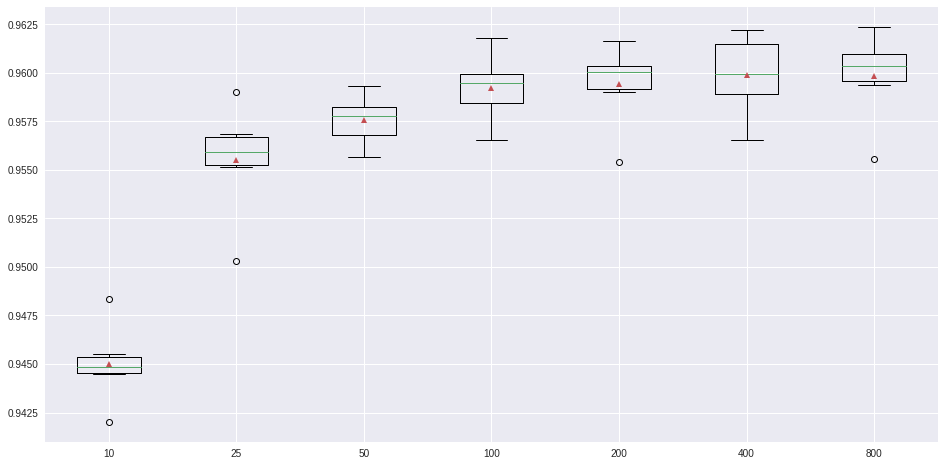

In [47]:
plt.figure(1, figsize=(16,8))
_ = plt.boxplot(res.values(), labels=res.keys(), showmeans=True)

In [49]:
%%time

sam={}
for i in [.1, .25, .5, .75, 1.]:
  model= BaggingClassifier(n_estimators=100, max_samples=i)

  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)
  sam[f'{i*100}%'] = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)



CPU times: user 3.81 s, sys: 555 ms, total: 4.37 s
Wall time: 27min 53s


In [50]:
print(sam)

{'10.0%': array([0.94597108, 0.94887949, 0.94572946, 0.94696106, 0.94395944,
       0.94824948]), '25.0%': array([0.95401092, 0.95589956, 0.95529955, 0.9552109 , 0.95343953,
       0.95475955]), '50.0%': array([0.95758085, 0.95640956, 0.95898959, 0.95908082, 0.95553956,
       0.95814958]), '75.0%': array([0.95962081, 0.95886959, 0.95928959, 0.95968081, 0.95652957,
       0.95781958]), '100.0%': array([0.95950081, 0.95715957, 0.96060961, 0.96106078, 0.95592956,
       0.96105961])}


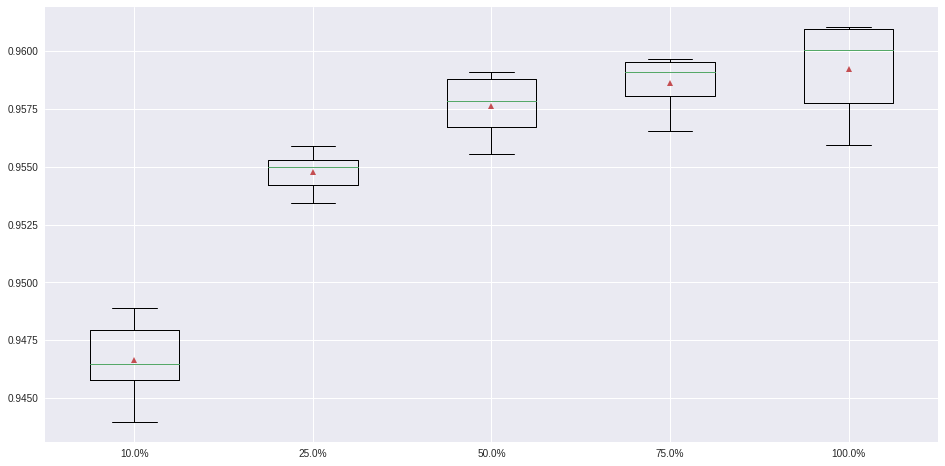

In [53]:
plt.figure(1, figsize=(16,8))
_ = plt.boxplot(sam.values(), labels=sam.keys(), showmeans=True)